Importing Libraries

In [33]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets

In [55]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

Display the first few rows of the movies dataset

In [56]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Display the first few rows of the ratings dataset

In [57]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


Pivot the ratings dataframe to create a matrix of movieId x userId

In [58]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Fill NaN values with 0

In [59]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculate the number of votes per movie

In [60]:
no_user_voted = ratings.groupby('movieId')['rating'].count()

Calculate the number of votes per user

In [61]:
no_movies_voted = ratings.groupby('userId')['rating'].count()

Plot the distribution of movie ratings

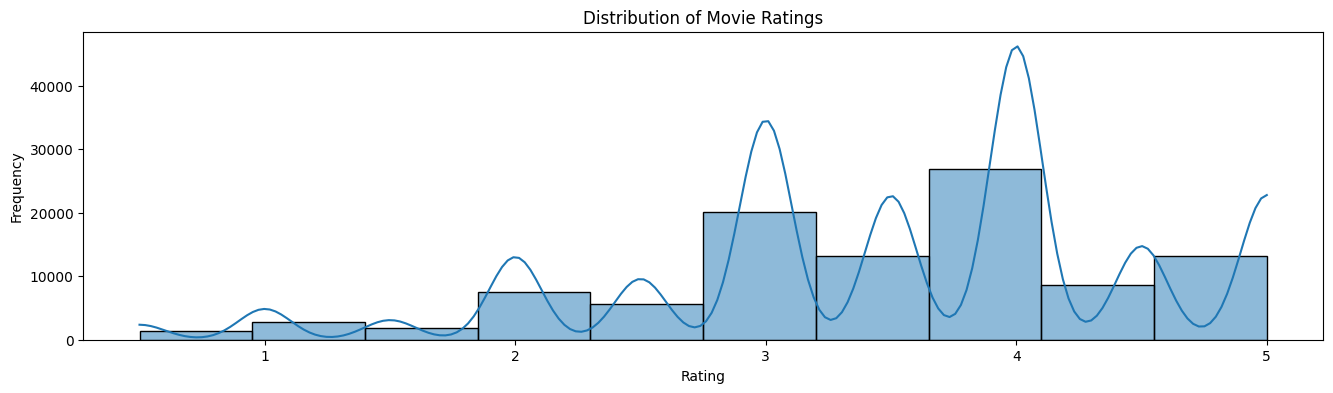

In [62]:
plt.figure(figsize=(16, 4))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()# Filter out movies with less than 10 votes
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

Filter out movies with less than 10 votes

In [63]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

Plot the number of votes per movie using a bar plot

<ipython-input-64-6b2e628d117c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_user_voted_sorted.index, y=no_user_voted_sorted, palette='viridis')


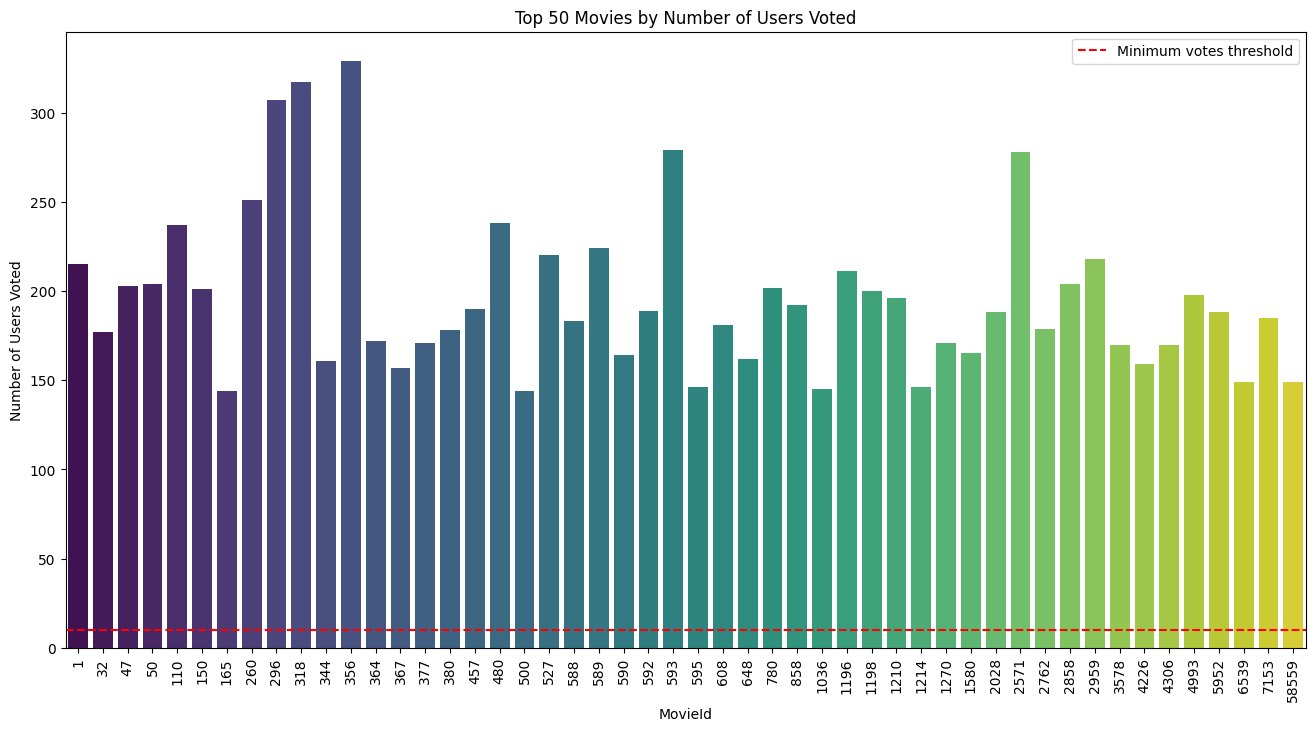

In [64]:
plt.figure(figsize=(16, 8))
no_user_voted_sorted = no_user_voted.sort_values(ascending=False).head(50)  # Plot top 50 movies for clarity
sns.barplot(x=no_user_voted_sorted.index, y=no_user_voted_sorted, palette='viridis')
plt.axhline(y=10, color='r', linestyle='--', label='Minimum votes threshold')
plt.title('Top 50 Movies by Number of Users Voted')
plt.xlabel('MovieId')
plt.ylabel('Number of Users Voted')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


Filter out users with less than 50 votes

In [65]:
final_dataset = final_dataset.loc[:, no_movies_voted[no_movies_voted > 50].index]

Display the final dataset

In [66]:
print(final_dataset)

userId   1    4    6    7    10   11   15   16   17   18   ...  600  601  602  \
movieId                                                    ...                  
1        4.0  0.0  0.0  4.5  0.0  0.0  2.5  0.0  4.5  3.5  ...  2.5  4.0  0.0   
2        0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  ...  4.0  0.0  4.0   
3        4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.5  0.0  0.0   
6        4.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  0.0  4.0  ...  0.0  0.0  3.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
174055   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
176371   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
177765   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.5  0.0   
179819   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
187593   0.0  0.0  0.0  0.0 

Calculate sparsity of a sample matrix

In [67]:
sample = np.array([[0, 0, 3, 0, 0], [4, 0, 0, 0, 2], [0, 0, 0, 0, 1]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(f'Sparsity of the sample matrix: {sparsity}')

Sparsity of the sample matrix: 0.7333333333333334


Convert the sample matrix to a CSR (Compressed Sparse Row) matrix

In [68]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


Convert the final dataset to a CSR matrix

In [69]:
csr_data = csr_matrix(final_dataset.values)

Reset the index of the final dataset

In [70]:
final_dataset.reset_index(inplace=True)

Initialize the KNN model with cosine similarity metric

In [71]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [72]:
def get_movie_recommendation(movie_name):
    # Number of movies to recommend
    n_movies_to_recommend = 10

    # Find the movieId from the title
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]

    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]

        # Find the K nearest neighbors
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend + 1)

        # Get the movie recommendations
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
        recommend_frame = []

        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})

        # Create a dataframe of recommended movies
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend + 1))
        return df
    else:
        return "No movies found. Please check your input"

Test the recommendation function

In [73]:
print(get_movie_recommendation('Jumanji'))

                                     Title  Distance
1                            Casper (1995)  0.474253
2                          Stargate (1994)  0.469654
3   Nightmare Before Christmas, The (1993)  0.462612
4                        Home Alone (1990)  0.443432
5              Beauty and the Beast (1991)  0.435007
6                           Aladdin (1992)  0.425428
7                     Jurassic Park (1993)  0.420563
8                    Mrs. Doubtfire (1993)  0.416164
9                         Mask, The (1994)  0.413743
10                   Lion King, The (1994)  0.377013
